<a href="https://colab.research.google.com/github/KotaMaheshKumar/KotaMaheshKumar/blob/main/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Colab DataSet/train.csv'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [5]:
df_train = pd.read_csv(path)
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.shape

(1460, 81)

**Univariate Analysis**


*   The Descriptive Analaysis is conducted to understand if possible apparent effects with the dependent variable 'SalePrice'.
*   Conduct descriptive statistics with 'SalePrice' variable.



In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

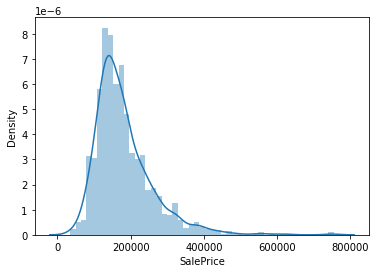

In [9]:
sns.distplot(df_train['SalePrice'])

*Observations from the distribution of saleprice*

1.   Deviated from the mean.
2.   Positive skewness.
3.   Shows some peakedness.



In [10]:
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Relation with other variables**

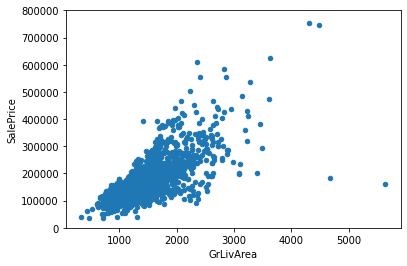

In [11]:
var = 'GrLivArea'
data1 = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data1.plot.scatter(x = var, y='SalePrice', ylim =(0,800000));

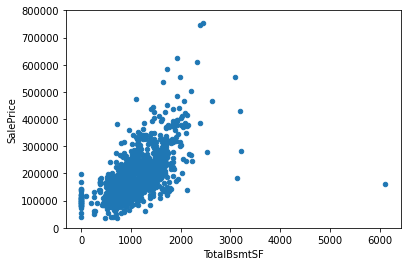

In [12]:
x = 'TotalBsmtSF'
y = 'SalePrice'
df_train.plot.scatter(x, y, ylim= (0,800000))



*   **GrLivArea**: It shows a linear relationship with SalePrice.
*   **TotalBsmtSF**: Also shows linear relationship especially strong
relationship(Slope is high).
*   Both variables shows the linear relationship, so provided if one variable increases the other also increases.






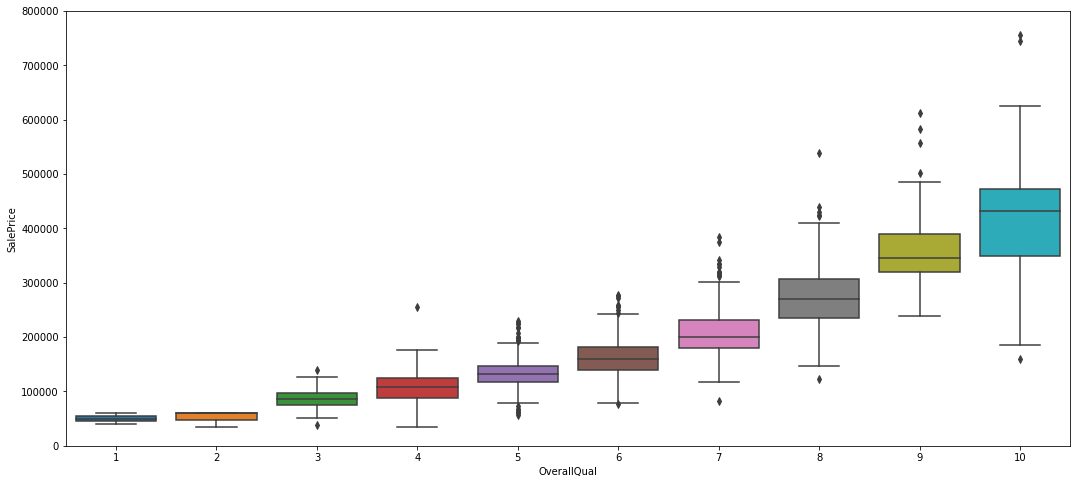

In [13]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
fig, ax = plt.subplots(figsize = (18,8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin=0, ymax = 800000);

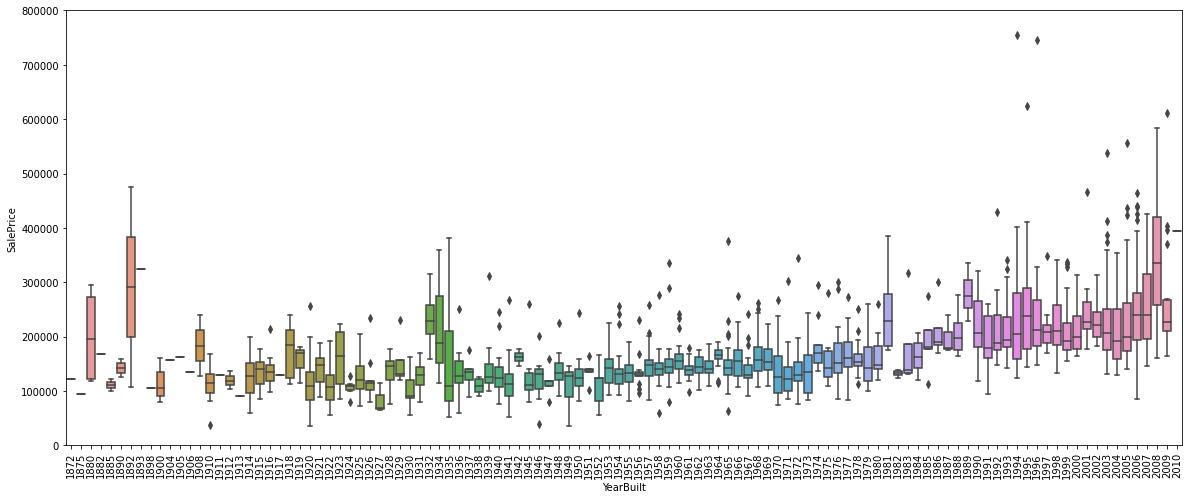

In [14]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
fig, ax = plt.subplots(figsize = (20,8))
fig = sns.boxplot(x= var, y= 'SalePrice', data = data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90);




*   **OverallQual**: We can observe a strong relationship with the SalePrice, with the increase in Quality sale price also increases.
*   **YearBuilt**: In particular cannot derive a strong relationship but can differniate the price patterns compared to the old houses and new. Inflation is also a decisive factor here.



# EDA

*Correlation matrix*

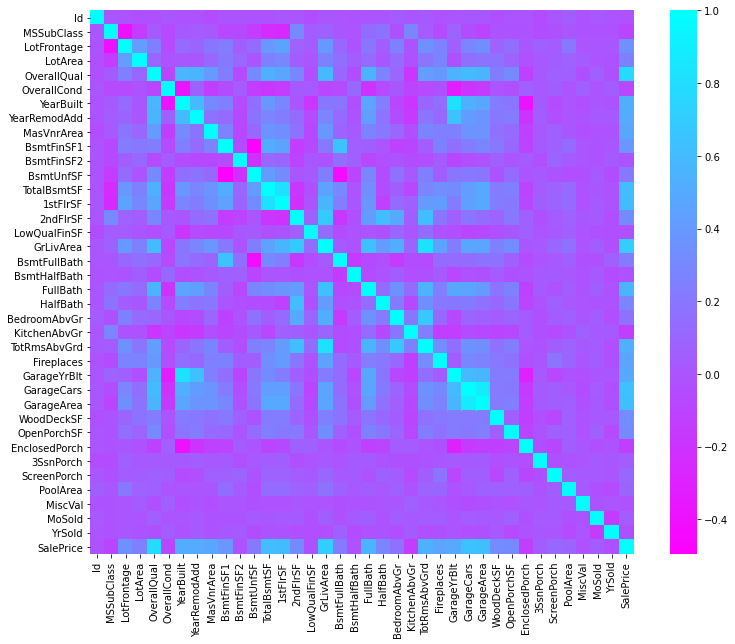

In [15]:
correlation = df_train.corr()
fig, ax =plt.subplots(figsize = (13, 10))
fig = sns.heatmap(correlation, square = True, cmap = 'cool_r')

*The heatmap provides an overall view about the relationship between variables*:

1.   The brighest squares with regard to the heatmap are 'TotalBsmtSF'/'1stFlrSF' and 'Garage' variables showing significant correlation between the variables. Signs of multicollinearity,accounts the same information.
2.   Also variables representing correlations are 'OverallQual','GrLivArea' and 'salePrice'.




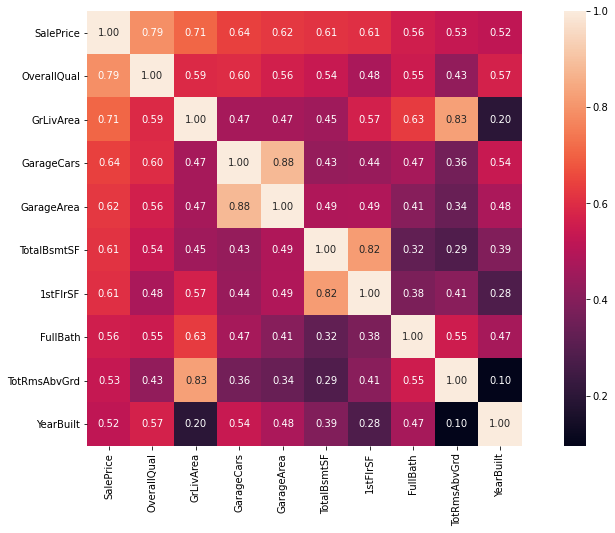

In [16]:
# SalePrice correlation matrix
k = 10
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
fig, ax = plt.subplots(figsize= (15,8))
fig = sns.heatmap(cm, square = True, annot= True, fmt = '.2f', annot_kws = {'size': 10},yticklabels = cols.values, xticklabels = cols.values)

*Heat map provides the correlation of 'SalePrice' with the other variables*:


*   It is evident that the variables 'OverallQual', 'GrLivArea', and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
*   'GarageCars' and 'GarageArea' exhibits strong correlation, the variables are intertwined with each other as GarageArea will be the factor to GarageCars.So further we use only one variable from these two variables.
*   Likewise,'TotalBsmtSF' & '1stFlrSF' exhibits the above relationship.
*   'FullBath','TotRmsAbvGrd' and 'YearBuilt' are slightly correlated with 'SalePrice' characteristics. 





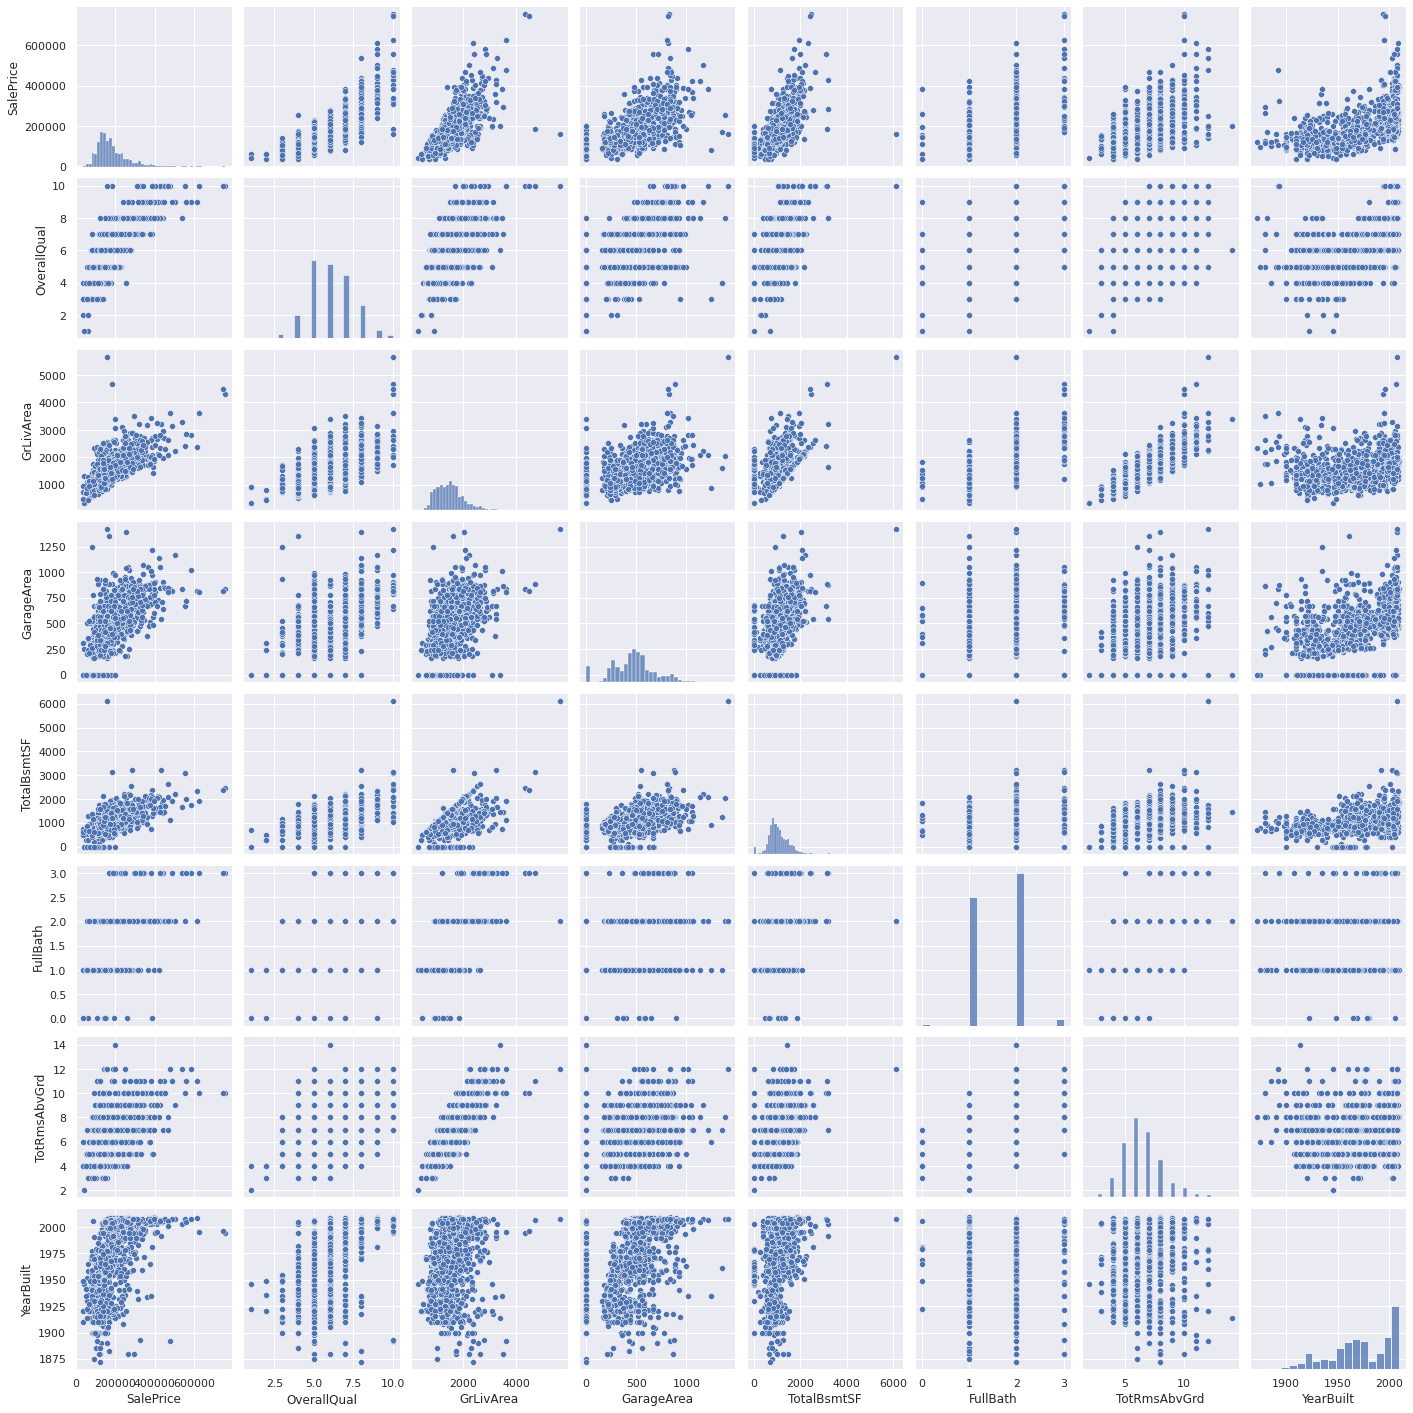

In [17]:
# Scatter plot 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5);

In [18]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [19]:
df_train = df_train.drop((missing_data[missing_data['Total'] >= 1]).index,1)
df_train.isnull().sum().max()

0

# Removal of Outliers

*Univariate Analysis*

In [20]:
# Standardizing the Data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Outer range(low) of the distribution:')
print(low_range)
print('\n Outer range(high) of the distribution:')
print(high_range)

Outer range(low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

 Outer range(high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


*Bivariate Analysis*

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


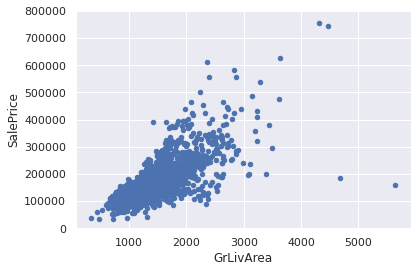

In [21]:
# saleprice/GrLivArea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [22]:
df_train.sort_values(by='GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


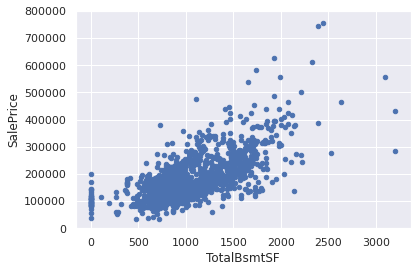

In [23]:
# Saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y= 'SalePrice', ylim = (0,800000))

# Test assumptions



*   Normality
*   Homoscedasticity
*   Linearity
*   Absence of correlated errors.





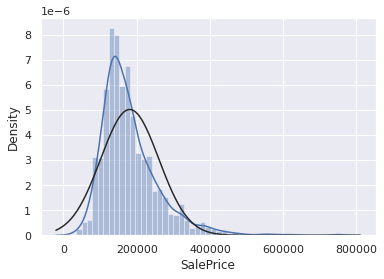

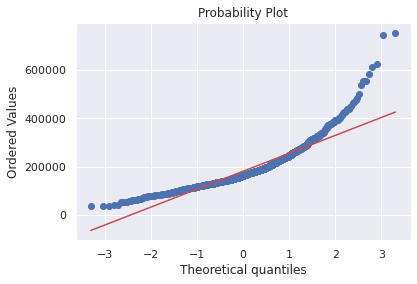

In [24]:
# Normality 
# Q-Q plot & Frequency Distribution
sns.distplot(df_train['SalePrice'], fit = norm)
plt.figure()
stats.probplot(df_train['SalePrice'], plot = plt);


*Sale Price is non-normal, shows 'peakedness' and positive skewness and also does not follow the diagonal line.*

**Data Transformations ensures that the variables meet requirements of statistical inference. Log transformations can be used to correct principle means of correcting non-normality.**

In [25]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

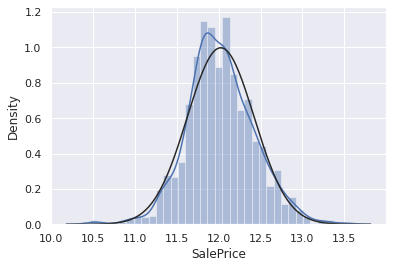

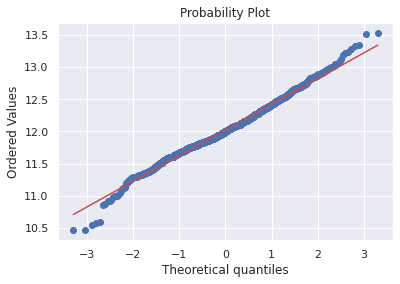

In [26]:
sns.distplot(df_train['SalePrice'], fit = norm)
plt.figure()
stats.probplot(df_train['SalePrice'], plot = plt);

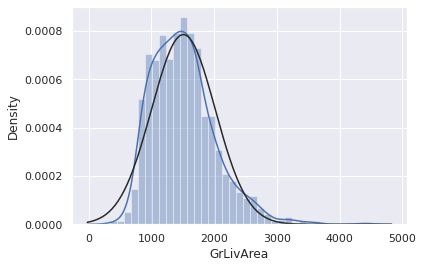

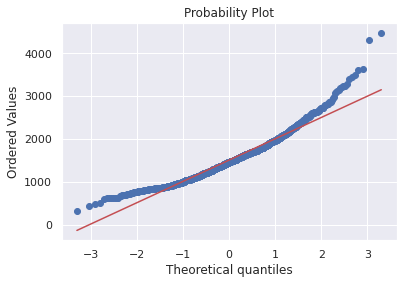

In [27]:
sns.distplot(df_train['GrLivArea'], fit= norm)
plt.figure()
stats.probplot(df_train['GrLivArea'], plot =plt);


In [28]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

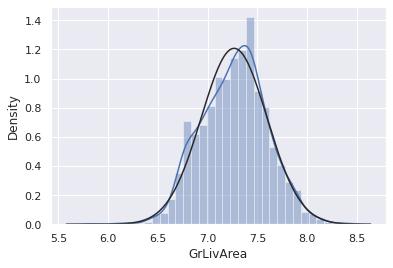

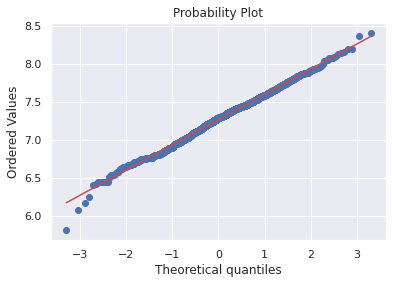

In [29]:
sns.distplot(df_train['GrLivArea'], fit = norm)
plt.figure()
stats.probplot(df_train['GrLivArea'], plot = plt);

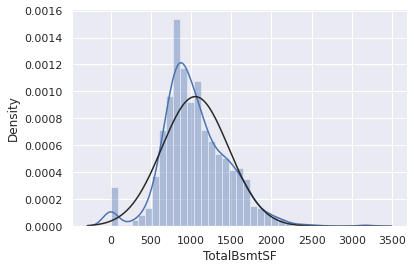

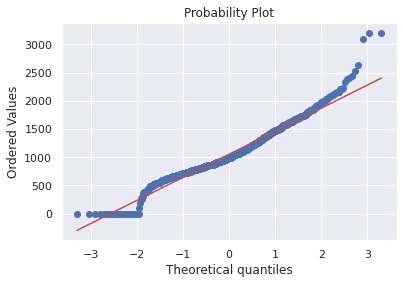

In [30]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
plt.figure()
stats.probplot(df_train['TotalBsmtSF'], plot = plt);

In [31]:
df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

In [34]:
# Creating column 'HasBsmt' because 'TotalBsmtSF' has values of 'float infinity' and cannot be converted using log transformations.
# So if area = 0 then 'HasBsmt' value is 0 else 1
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 1, 'HasBsmt'] = 1

In [37]:
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

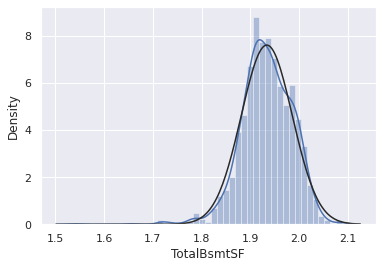

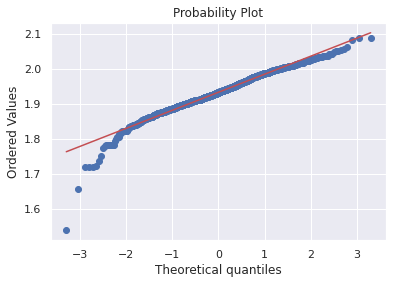

In [41]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'],fit = norm)
plt.figure()
stats.probplot(df_train[df_train['TotalBsmtSF'] >0]['TotalBsmtSF'], plot = plt);

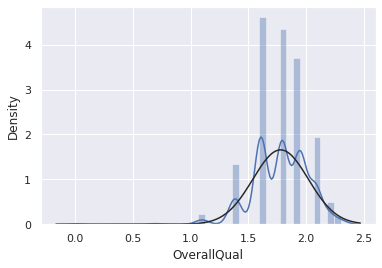

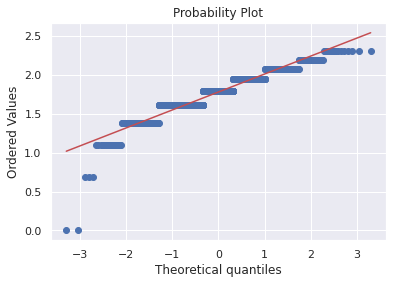

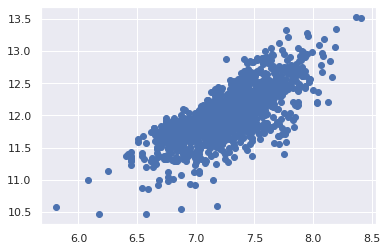

In [45]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

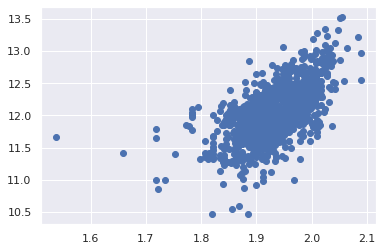

In [50]:
plt.scatter(df_train[df_train['TotalBsmtSF'] >0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);